In [29]:
# import Data Manupulating library called Pandas 
import pandas as pd 
# import Data Visualization Library called Matplotlib.pyplot
import matplotlib.pyplot as plt 
import seaborn as sns 


In [15]:
df = pd.read_csv("Business Case_Moneyonclick.csv")
df.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,28-Jul-13,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20%,50,40.0
1,30-Jul-13,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20%,50,40.0
2,05-Jul-13,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20%,100,80.0
3,21-Jul-13,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20%,352,281.6
4,29-Jul-13,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20%,202,161.6


In [16]:
print("Column headers in the Data Frame : ", df.columns)
print("Number of Rows and Columns in dataframe : ", df.shape)

Column headers in the Data Frame :  Index(['Order Date', 'Week Number', 'Order ID', 'Category', 'Item Type',
       'Seller Name', 'Brand', 'Item Title', 'Bar Code', 'Quantity sold',
       'Margin %', 'Price', 'Cost'],
      dtype='object')
Number of Rows and Columns in dataframe :  (27462, 13)


## What are the Total Sales for  each Category in the Week 29

`SQL Query`

`SELECT Category, sum(Qunatity_sold) FROM Sales_table`

`WHERE Week_Number == 29`

`GROUPBY Category `

In [17]:
# let us first get All the Week 29 data points and ythen make Week29 data frame 
Week29 = df[df["Week Number"] == 29]
Week29.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
9,15-Jul-13,29,3209792,Watches & Accessories,Watches,absholding,Casio,"""Casio Men's A178WA-1A Illuminator Bracelet Di...",2724275029525,2,20%,190,152.0
17,15-Jul-13,29,3212508,Watches & Accessories,Watches,shabs152,Casio,"""Casio Women's LQ139E-1A Classic Round Analog ...",2724275061068,1,20%,59,47.2
21,17-Jul-13,29,3220578,Watches & Accessories,Watches,absholding,Casio,"""Casio Women's LRW200H-1BVCF Dive Series Diver...",2724275032396,1,20%,83,66.4
40,16-Jul-13,29,3216944,Watches & Accessories,Watches,max-store,Casio,"""Casio Women's LRW200H-7E2VCF Dive Series Dive...",2724275018796,1,20%,110,88.0
41,16-Jul-13,29,3217693,Watches & Accessories,Watches,max-store,Casio,"""Casio Women's LRW200H-7E2VCF Dive Series Dive...",2724275018796,1,20%,110,88.0


In [26]:
# Now, Group the week29 dartaframe by Category
Grouped_Week29 = Week29.groupby('Category')["Quantity sold"].sum().reset_index()

In [27]:
Grouped_Week29

,Category,Quantity sold
0,Bags & Shoes,278
1,Clothing & Accessories,286
2,Computers & Networking,251
3,Electronics,163
4,Health & Beauty,2284
5,Jewelry,3
6,Mobiles & Accessories,707
7,Watches & Accessories,2124


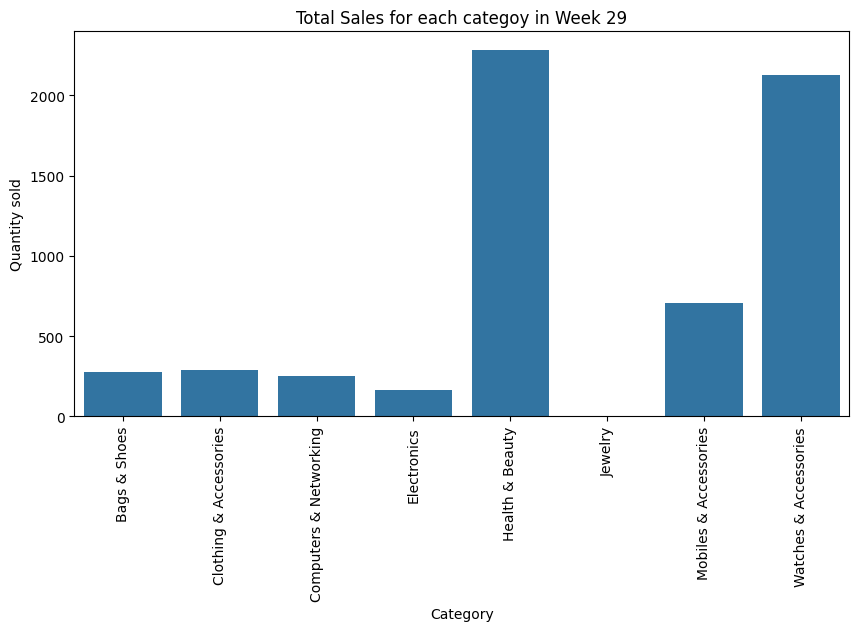

In [46]:
plt.figure(figsize=(10,5))

sns.barplot(Grouped_Week29, x = 'Category', y = "Quantity sold")

plt.title("Total Sales for each categoy in Week 29")
plt.yticks()
plt.xticks(rotation = 90)
plt.show()

## Share the sales and margin trends by category over the last 4 weeks basis the total orders, cost and margins. Create charts to depict the trends

In [49]:
df

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,28-Jul-13,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20%,50,40.0
1,30-Jul-13,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20%,50,40.0
2,05-Jul-13,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20%,100,80.0
3,21-Jul-13,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20%,352,281.6
4,29-Jul-13,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20%,202,161.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27457,14-Jul-13,29,3205165,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912345,1,20%,100,80.0
27458,15-Jul-13,29,3209552,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912338,1,20%,100,80.0
27459,16-Jul-13,29,3217697,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912345,1,20%,100,80.0
27460,17-Jul-13,29,3223811,Bags & Shoes,Handbags,Fashion,In Love Again,In Love Again Faux Crocodile Leather Shoulder Bag,2724276912376,1,20%,100,80.0


In [57]:

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

last_4_weeks = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(weeks=4)]


/tmp/ipykernel_4400/3867589273.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [61]:
last_4_weeks.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,2013-07-28,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20%,50,40.0
1,2013-07-30,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20%,50,40.0
2,2013-07-05,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20%,100,80.0
3,2013-07-21,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20%,352,281.6
4,2013-07-29,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20%,202,161.6


In [66]:
order_id_trend = last_4_weeks.groupby("Category")["Order ID"].nunique().reset_index()
order_id_trend

,Category,Order ID
0,Bags & Shoes,984
1,Clothing & Accessories,1181
2,Computers & Networking,1254
3,Electronics,697
4,Health & Beauty,5556
5,Jewelry,11
6,Mobiles & Accessories,3195
7,Watches & Accessories,7701


In [59]:
# Group by 'Category' and aggregate data for total orders, cost, and margins
category_trends = last_4_weeks.groupby(['Category', 'Week Number']).agg({
    'Order ID': 'nunique',    # Count unique orders for total orders
    'Cost': 'sum',            # Sum of costs for total cost
    'Margin %': 'mean'        # Average margin percentage for margin trend
}).reset_index()

TypeError: agg function failed [how->mean,dtype->object]